In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("aviation-accident-data-2023-05-16.csv", low_memory=False)


In [5]:
print(df.head())

        date             type registration       operator fatalities  \
0  date unk.   Antonov An-12B       T-1206  Indonesian AF        NaN   
1  date unk.   Antonov An-12B       T-1204  Indonesian AF        NaN   
2  date unk.   Antonov An-12B       T-1201  Indonesian AF        NaN   
3  date unk.  Antonov An-12BK          NaN      Soviet AF        NaN   
4  date unk.  Antonov An-12BP   CCCP-11815      Soviet AF          0   

              location          country cat     year  
0                  NaN  Unknown country  U1  unknown  
1                  NaN  Unknown country  U1  unknown  
2                  NaN  Unknown country  U1  unknown  
3  Tiksi Airport (IKS)           Russia  A1  unknown  
4  Massawa Airport ...          Eritrea  A1  unknown  


In [6]:
print("Shape:", df.shape)
df.columns.tolist()

Shape: (23967, 9)


['date',
 'type',
 'registration',
 'operator',
 'fatalities',
 'location',
 'country',
 'cat',
 'year']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [9]:
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')


In [10]:
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').astype('Int64')
df


,date,type,registration,operator,fatalities,location,country,cat,year
0,NaT,Antonov An-12B,T-1206,Indonesian AF,<NA>,NaN,Unknown country,U1,<NA>
1,NaT,Antonov An-12B,T-1204,Indonesian AF,<NA>,NaN,Unknown country,U1,<NA>
2,NaT,Antonov An-12B,T-1201,Indonesian AF,<NA>,NaN,Unknown country,U1,<NA>
3,NaT,Antonov An-12BK,NaN,Soviet AF,<NA>,Tiksi Airport (IKS),Russia,A1,<NA>
4,NaT,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,<NA>
...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          23408 non-null  datetime64[ns]
 1   type          23967 non-null  object        
 2   registration  22419 non-null  object        
 3   operator      23963 non-null  object        
 4   fatalities    19676 non-null  Int64         
 5   location      23019 non-null  object        
 6   country       23967 non-null  object        
 7   cat           23967 non-null  object        
 8   year          23906 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), object(6)
memory usage: 1.7+ MB


In [12]:
df.isnull().sum()


date             559
type               0
registration    1548
operator           4
fatalities      4291
location         948
country            0
cat                0
year              61
dtype: int64

In [13]:
df = df.dropna(subset=['date'])


In [14]:
df['registration'].fillna('Unknown', inplace=True)


c:\Users\viona\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [15]:
df['operator'].fillna('Unknown', inplace=True)


In [16]:
# Replace NaN fatalities with -1 to indicate "unknown"
df['fatalities_missing'] = df['fatalities'].isnull()
df['fatalities'] = df['fatalities'].fillna(-1)
df

<ipython-input-16-8cdc300fe4f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities_missing'] = df['fatalities'].isnull()
<ipython-input-16-8cdc300fe4f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities'] = df['fatalities'].fillna(-1)


,date,type,registration,operator,fatalities,location,country,cat,year,fatalities_missing
61,1919-08-02,Caproni Ca.48,Unknown,Caproni,14,Verona,Italy,A1,1919,False
62,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919,False
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920,False
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920,False
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920,False
...,...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023,False
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023,False
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023,False
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023,False


In [17]:
df['location'].fillna('Unknown', inplace=True)


c:\Users\viona\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [18]:
df['year'] = df['year'].fillna(df['date'].dt.year)


<ipython-input-18-66ff39ed6772>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].fillna(df['date'].dt.year)


In [19]:
df.isnull().sum()


date                  0
type                  0
registration          0
operator              0
fatalities            0
location              0
country               0
cat                   0
year                  0
fatalities_missing    0
dtype: int64

In [20]:
df.duplicated().sum()   
df = df.drop_duplicates()


In [21]:
print(df.head(10))


         date                     type registration  \
61 1919-08-02            Caproni Ca.48      Unknown   
62 1919-08-11          Felixstowe Fury         N123   
63 1920-02-23         Handley Page O/7       G-EANV   
64 1920-02-25       Handley Page O/400       G-EAMC   
65 1920-06-30       Handley Page O/400       G-EAKE   
66 1920-12-14       Handley Page O/400       G-EAMA   
67 1921-01-15            Aeromarine 75      Unknown   
68 1921-03-02         Handley Page O/7       G-IAAC   
69 1921-03-04  Caproni Ca.60 Noviplano      Unknown   
70 1921-08-26      Farman F.60 Goliath       O-BLAN   

                     operator  fatalities                  location  \
61                    Caproni          14                    Verona   
62                        RAF           1       near Felixtowe RNAS   
63     Handley Page Transport           0       Acadia Siding, C...   
64     Handley Page Transport           0           near El Shereik   
65     Handley Page Transport          

In [22]:
df['location'] = df['location'].str.encode('latin1', errors='ignore').str.decode('utf-8', errors='ignore')


<ipython-input-22-1976a1aef35c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].str.encode('latin1', errors='ignore').str.decode('utf-8', errors='ignore')


In [23]:
text_columns = ['location', 'operator', 'country']  # adjust if needed
for col in text_columns:
    df[col] = df[col].str.encode('latin1', errors='ignore').str.decode('utf-8', errors='ignore')


<ipython-input-23-cceba7fb344c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.encode('latin1', errors='ignore').str.decode('utf-8', errors='ignore')


In [24]:
df['country'] = df['country'].str.strip().str.title()
df['operator'] = df['operator'].str.strip()


<ipython-input-24-f421a700792d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].str.strip().str.title()
<ipython-input-24-f421a700792d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['operator'] = df['operator'].str.strip()


In [25]:
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')


<ipython-input-25-30a2e64ad582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')


In [26]:
#finding outliers which mostly apperas in numerical columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)


Index(['fatalities', 'year'], dtype='object')


In [27]:
#detecting outliers per column by using IQR Method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"Column: {col}")
    print(f"Outliers found: {outliers.shape[0]}")
    print(outliers[[col]].head(), "\n")


Column: fatalities
Outliers found: 2618
     fatalities
61           14
75           14
112          14
135          16
155          12 

Column: year
Outliers found: 0
Empty DataFrame
Columns: [year]
Index: [] 



In [28]:
#handlind outliers column by column
#for fatalities
import numpy as np
df['fatalities'] = df['fatalities'].replace(-1, np.nan)


<ipython-input-28-36a7eaf7b7ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities'] = df['fatalities'].replace(-1, np.nan)


In [29]:
#for year
df = df[(df['year'] >= 1900) & (df['year'] <= 2025)]



In [30]:
#creating new column to make analysis much more easiear
#Group accidents into 10-year periods for trend analysis.
df['decade'] = (df['year'] // 10) * 10
df['decade']


61       1910
62       1910
63       1920
64       1920
65       1920
         ... 
23962    2020
23963    2020
23964    2020
23965    2020
23966    2020
Name: decade, Length: 23303, dtype: Int64

In [31]:
#basically we have created fatal accident colunm
#out put would either be 1= fatal ,0=non fatal and NA=missing fatalities
df['fatal_accident'] = (df['fatalities'] > 0).astype('Int64')
df['fatal_accident'].head()


61    1
62    1
63    0
64    0
65    0
Name: fatal_accident, dtype: Int64

In [32]:
#creating a new column called seasons
#basically the seasons of the accident
# key lines used in the demo
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month

month_to_season = {
    1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10 : 'Fall', 11: 'Fall',
    12: 'Winter'
}

df['season'] = df['month'].map(month_to_season).astype('category')
print(df[['date', 'month', 'season']].head(10))
                 

         date  month  season
61 1919-08-02      8  Summer
62 1919-08-11      8  Summer
63 1920-02-23      2  Winter
64 1920-02-25      2  Winter
65 1920-06-30      6  Summer
66 1920-12-14     12  Winter
67 1921-01-15      1  Winter
68 1921-03-02      3  Spring
69 1921-03-04      3  Spring
70 1921-08-26      8  Summer


In [33]:
#the output means winter had the most accidents
df['season'].value_counts()


Winter    5889
Spring    5872
Summer    5772
Fall      5770
Name: season, dtype: int64

In [34]:
#we are grouping countries into regions (Africa, Europe, etc.) for geographic analysis.
#lets creat a mappping dictionary
# Example dictionary (you can add more countries later)
country_to_region = {
    # Africa
    'Kenya': 'Africa', 'Nigeria': 'Africa', 'South Africa': 'Africa', 'Sudan': 'Africa',
    
    # Europe
    'U.K.': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe',
    
    # North America
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    
    # South America
    'Brazil': 'South America', 'Argentina': 'South America', 'Chile': 'South America',
    
    # Asia
    'China': 'Asia', 'India': 'Asia', 'Japan': 'Asia', 'Indonesia': 'Asia',
    
    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania',
    
    # Middle East
    'Iran': 'Middle East', 'Iraq': 'Middle East', 'Saudi Arabia': 'Middle East'
}


In [35]:
#will creat a region column
df['region'] = df['country'].map(country_to_region).fillna('Other')
#lets review our region column which we created above
print(df[['country', 'region']].head(20))





           country  region
61           Italy  Europe
62            U.K.  Europe
63    South Africa  Africa
64           Sudan  Africa
65          Sweden   Other
66            U.K.  Europe
67            Cuba   Other
68           India    Asia
69           Italy  Europe
70          France  Europe
71         Belgium   Other
72         Belgium   Other
73          France  Europe
74          France  Europe
75           China    Asia
76          France  Europe
77  Atlantic Ocean   Other
78          France  Europe
79          France  Europe
80          France  Europe


In [36]:
#finished creating the new columns

In [37]:
#summary statics of our dataframe 
print(df.describe())


         fatalities          year        decade  fatal_accident         month
count  19441.000000  23303.000000  23303.000000    19441.000000  23303.000000
mean       6.207448   1973.992104   1969.564863        0.460470      6.507875
std       18.787016     25.408126     25.434840        0.498448      3.471553
min        0.000000   1919.000000   1910.000000        0.000000      1.000000
25%        0.000000   1948.000000   1940.000000        0.000000      3.000000
50%        0.000000   1972.000000   1970.000000        0.000000      7.000000
75%        5.000000   1995.000000   1990.000000        1.000000      9.000000
max      520.000000   2023.000000   2020.000000        1.000000     12.000000


In [38]:
# Overview of non-numeric columns
print(df.describe(include='object'))


                        type registration operator location country    cat  \
count                  23303        23303    23303    23303   23303  23303   
unique                  3169        21475     5906    14438     232     11   
top     Douglas C-47A (DC-3)      Unknown    USAAF  Unknown     Usa     A1   
freq                    1899         1393     2590      780    4354  17031   

       region  
count   23303  
unique      8  
top     Other  
freq    15739  


In [39]:
#we are know doing a value count for the new columns we created
# How many accidents by season
print(df['season'].value_counts())

# How many by decade
print(df['decade'].value_counts().sort_index())

# How many by region
print(df['region'].value_counts())

# Fatal vs non-fatal accidents
print(df['fatal_accident'].value_counts())


Winter    5889
Spring    5872
Summer    5772
Fall      5770
Name: season, dtype: int64
1910       2
1920      68
1930     369
1940    5658
1950    2348
1960    2563
1970    2753
1980    2210
1990    2469
2000    2161
2010    2094
2020     608
Name: decade, dtype: Int64
Other            15739
Europe            2478
Asia              1894
North America     1152
South America      936
Africa             471
Oceania            362
Middle East        271
Name: region, dtype: int64
0    10489
1     8952
Name: fatal_accident, dtype: Int64


In [40]:
#After a statics summarry of the data set we are going to group and aggregate

#Basically we are going to see the ne wcolumns we created expalin the data

In [41]:
# accidents per decade
print(df['decade'].value_counts().sort_index())

# fatalities by season
print(df.groupby('season')['fatalities'].sum())

# accidents per region
print(df['region'].value_counts())


1910       2
1920      68
1930     369
1940    5658
1950    2348
1960    2563
1970    2753
1980    2210
1990    2469
2000    2161
2010    2094
2020     608
Name: decade, dtype: Int64
season
Fall      31773
Spring    27206
Summer    30779
Winter    30921
Name: fatalities, dtype: Int64
Other            15739
Europe            2478
Asia              1894
North America     1152
South America      936
Africa             471
Oceania            362
Middle East        271
Name: region, dtype: int64


In [42]:
#save the cleaned data
df.to_csv("aviation_cleaned_data.csv",index=False)


In [ ]:
df=pd.read_csv("aviation_cleaned_data.csv")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23303 entries, 61 to 23966
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                23303 non-null  datetime64[ns]
 1   type                23303 non-null  object        
 2   registration        23303 non-null  object        
 3   operator            23303 non-null  object        
 4   fatalities          19441 non-null  Int64         
 5   location            23303 non-null  object        
 6   country             23303 non-null  object        
 7   cat                 23303 non-null  object        
 8   year                23303 non-null  Int64         
 9   fatalities_missing  23303 non-null  bool          
 10  decade              23303 non-null  Int64         
 11  fatal_accident      19441 non-null  Int64         
 12  month               23303 non-null  int64         
 13  season              23303 non-null  category 

In [ ]:
#After seeing how the new columns relate with the database we can visualize our analysis

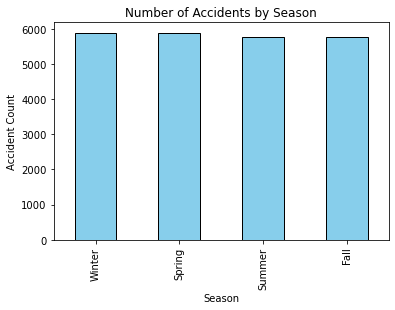

In [ ]:
#A visual of a bar plot indicating number of Accidents per season
import matplotlib.pyplot as plt

df['season'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Accidents by Season")
plt.xlabel("Season")
plt.ylabel("Accident Count")
plt.show()



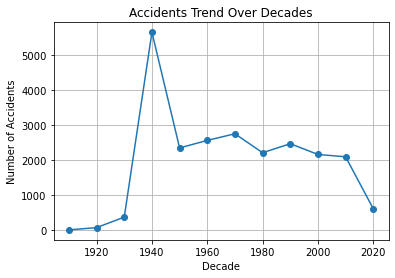

In [ ]:
# line plot of accidents per decades as we created the new column dcalled decade
df['decade'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Accidents Trend Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()


In [ ]:
#we can see  accidents increased during 1940s–1980s (WWII, more flying) and dropped later.

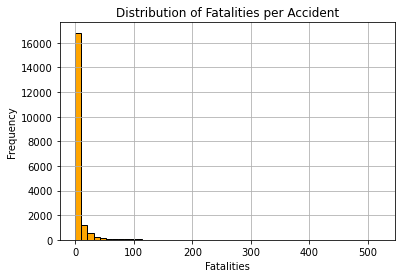

In [ ]:
#A visual on fatalities distribution
df['fatalities'].hist(bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Fatalities per Accident")
plt.xlabel("Fatalities")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#we can see that Most accidents have 0–5 fatalities, but the long right tail shows rare disasters (100+ fatalities).

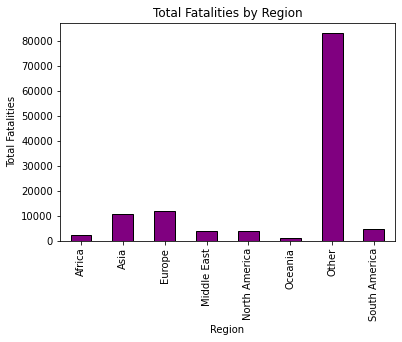

In [ ]:
#A Visual of Barplot showing fatilities by region
df.groupby('region')['fatalities'].sum().plot(kind='bar', color='purple', edgecolor='black')
plt.title("Total Fatalities by Region")
plt.xlabel("Region")
plt.ylabel("Total Fatalities")
plt.show()


In [ ]:
#we can see oceania region has the less fatalities